### 목표
- 붓꽃데이터의 꽃잎의 길이, 너비, 꽃받침의 길이, 너비 활용해서 꽃품종을 분류해보자
- knn모델의 이웃의 숫자를 조정해보자(하이퍼 파라미터 튜닝)

In [2]:
import warnings
warnings.filterwarnings(action= 'ignore')

In [3]:
# 도구
from sklearn.datasets import load_iris # iris 데이터 
import pandas as pd
import matplotlib.pyplot as plt
# knn
from sklearn.neighbors import KNeighborsClassifier
# 훈련,테스트 분리
from sklearn.model_selection import train_test_split
# 정확도 측정하는 도구
from sklearn.metrics import accuracy_score

In [5]:
# 데이터 불러오기 
iris_data = load_iris()
iris_data

# 데이터셋 구조: 번치객체 (딕셔너리와 유사)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
# 키 keys()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
# 데이터 확인 
# 문제 데이터 : X
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
# 실제답(Label) 확인
# 답 데이터 : y
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# iris 품종 확인
iris_data.target_names
# 'setosa'-0, 'versicolor'-1, 'virginica'-2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
# 특성의 이름 확인(컬럼명)
iris_data.feature_names
# ['sepal length (cm)', 꽃받침의 길이
#  'sepal width (cm)', 꽃받침의 너비
#  'petal length (cm)', 꽃잎의 길이
#  'petal width (cm)'] 꽃잎의 너비

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
# 데이터 정보 확인
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### 데이터 셋 구성하기
- 문제와 답 분리 인덱싱
- 훈련세트와 테스트세트 분리 train_test_split

In [14]:
# 데이터 프레임화 
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
# 문제와 답으로 분리
X = iris_df# 문제 2차원
y = iris_data.target # 답 1차원

In [34]:
# 훈련데이터와 테스트 데이터 분리
# 70%,30% 비율로 분리
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,
                                                random_state = 65)
# random_state 랜덤샘플링 
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
132,6.4,2.8,5.6,2.2
129,7.2,3.0,5.8,1.6
83,6.0,2.7,5.1,1.6
19,5.1,3.8,1.5,0.3
27,5.2,3.5,1.5,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
40,5.0,3.5,1.3,0.3
63,6.1,2.9,4.7,1.4
117,7.7,3.8,6.7,2.2


In [35]:
# 데이터 크기 확인
print('훈련 문제 :', X_train.shape)
print('훈련 답:', y_train.shape)
print('테스트 문제:', X_test.shape)
print('테스트 답:', y_test.shape)

훈련 문제 : (105, 4)
훈련 답: (105,)
테스트 문제: (45, 4)
테스트 답: (45,)


In [36]:
# 분리된 데이터 클래스별로 몇개씩 있는지 확인
# 7:3 나눴을때의 분포
import numpy as np
np.bincount(y_train)

array([34, 36, 35], dtype=int64)

#### EDA 

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

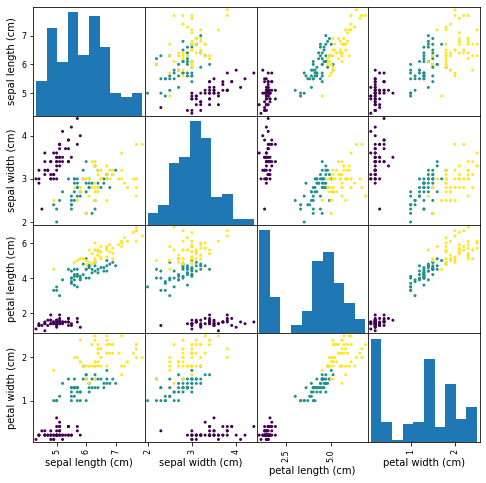

In [37]:
# 변수간의 상관관계 확인
pd.plotting.scatter_matrix(iris_df,figsize =(8,8),c = y, alpha = 3)

#### 모델링

In [38]:
# 모델 생성
# n_neighbors 하이퍼 파라미터
knn_model = KNeighborsClassifier(n_neighbors=5)

In [39]:
# 모델 학습
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [41]:
# 모델 예측
pre = knn_model.predict(X_test)

In [42]:
# 모델 평가
accuracy_score(y_test,pre) # 93% 정확도

0.9333333333333333

#### 하이퍼 파라미터 튜닝

In [43]:
test_list = []
train_list = []

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    
    # test 정확도
    pre = knn.predict(X_test)
    test_list.append(accuracy_score(y_test,pre))
    
    # train 정확도
    pre2 = knn.predict(X_train)
    train_list.append(accuracy_score(y_train,pre2))

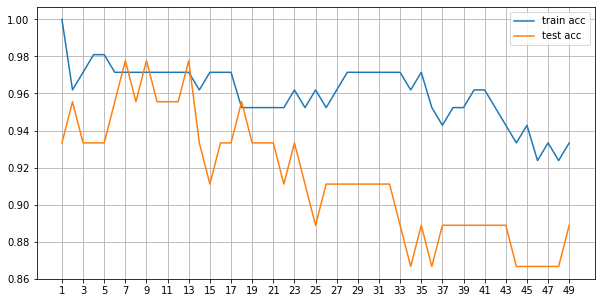

In [49]:
# 그래프화 시켜보기
plt.figure(figsize = (10,5))
plt.plot(range(1,50), train_list, label = 'train acc')
plt.plot(range(1,50), test_list, label = 'test acc')
plt.grid() # 눈금격자
plt.xticks(range(1,50,2)) # 눈금축 설정
plt.legend()
plt.show()

# 또다른 파라미터값으로 바꾸는 것이 의미가 x
# k 값이 5 가 최적이라고 봐짐